# 02 - Análisis Exploratorio de Datos (EDA)

**Objetivo:** Explorar y visualizar los datos para entender patrones, correlaciones y problemas.

**Input:** `data/processed/dataset_modelo.csv`

**Output:** Gráficos en `data/processed/`

## 1. Setup

In [9]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración de gráficos
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Directorio de trabajo
os.chdir("/Users/javiermondragon/Documents/data_projects/inflation-predictor")

print("Setup completo")

Setup completo


In [10]:
# Cargar datos
df = pd.read_csv('data/processed/dataset_modelo.csv', parse_dates=['date'])

print(f"Dataset cargado: {len(df)} filas")
print(f"Período: {df['date'].min().strftime('%Y-%m')} a {df['date'].max().strftime('%Y-%m')}")
print(f"Columnas: {list(df.columns)}")

Dataset cargado: 479 filas
Período: 1986-01 a 2025-12
Columnas: ['date', 'cpi', 'fed_rate', 'oil_price', 'gold_price']


## 2. Estadísticas Descriptivas

In [11]:
# Variables numéricas
variables = ['cpi', 'fed_rate', 'oil_price', 'gold_price']

print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 60)
df[variables].describe().round(2)

ESTADÍSTICAS DESCRIPTIVAS


,cpi,fed_rate,oil_price,gold_price
count,479.00,479.00,479.00,479.00
mean,200.61,3.35,48.07,917.88
std,56.42,2.66,29.37,707.40
min,108.70,0.05,11.35,256.08
25%,154.30,0.40,20.21,367.03
50%,199.10,3.22,42.34,510.10
75%,237.89,5.33,71.21,1325.64
max,326.03,9.85,133.88,4309.23


In [12]:
# Estadísticas adicionales
print("\nESTADÍSTICAS ADICIONALES")
print("=" * 60)

for var in variables:
    print(f"\n{var.upper()}")
    print(f"  Mediana: {df[var].median():.2f}")
    print(f"  Asimetría (skew): {df[var].skew():.2f}")
    print(f"  Curtosis: {df[var].kurtosis():.2f}")
    print(f"  Coef. variación: {(df[var].std() / df[var].mean() * 100):.1f}%")


ESTADÍSTICAS ADICIONALES

CPI
  Mediana: 199.10
  Asimetría (skew): 0.31
  Curtosis: -0.73
  Coef. variación: 28.1%

FED_RATE
  Mediana: 3.22
  Asimetría (skew): 0.28
  Curtosis: -1.04
  Coef. variación: 79.5%

OIL_PRICE
  Mediana: 42.34
  Asimetría (skew): 0.58
  Curtosis: -0.83
  Coef. variación: 61.1%

GOLD_PRICE
  Mediana: 510.10
  Asimetría (skew): 1.38
  Curtosis: 2.34
  Coef. variación: 77.1%


## 3. Distribuciones

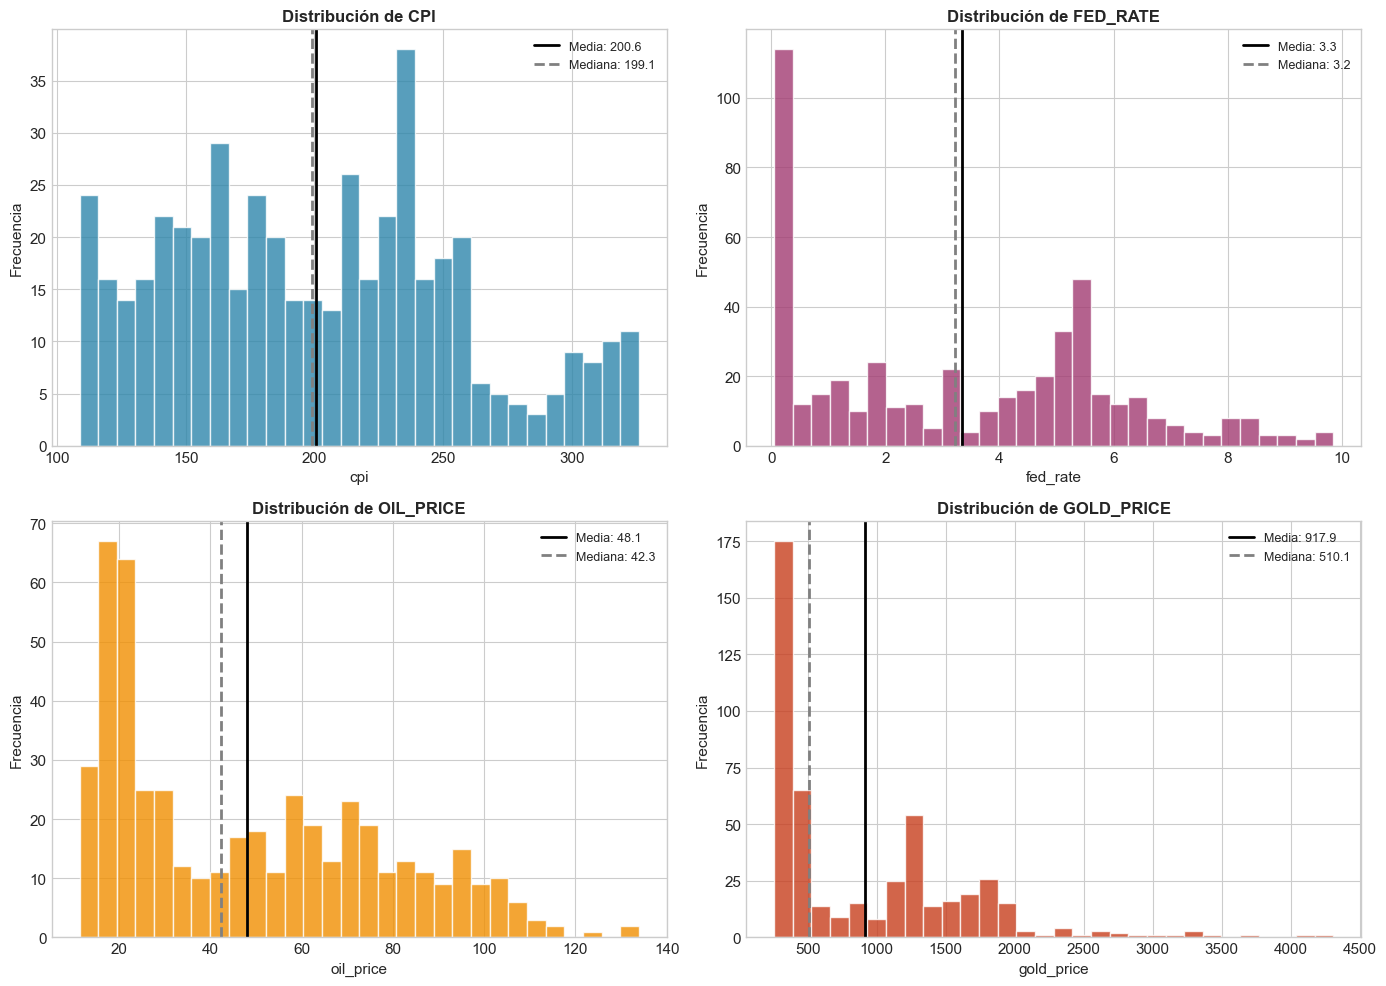

Guardado: eda_01_distribuciones.png


In [13]:
# Histogramas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colores = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

for ax, var, color in zip(axes.flatten(), variables, colores):
    ax.hist(df[var], bins=30, color=color, edgecolor='white', alpha=0.8)
    ax.set_title(f'Distribución de {var.upper()}', fontsize=12, fontweight='bold')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    
    # Líneas de media y mediana
    media = df[var].mean()
    mediana = df[var].median()
    ax.axvline(media, color='black', linestyle='-', linewidth=2, label=f'Media: {media:.1f}')
    ax.axvline(mediana, color='gray', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.1f}')
    ax.legend(fontsize=9)

plt.tight_layout()
plt.savefig('figures/eda_01_distribuciones.png', dpi=150, bbox_inches='tight')
plt.show()
print("Guardado: eda_01_distribuciones.png")

## 4. Series de Tiempo

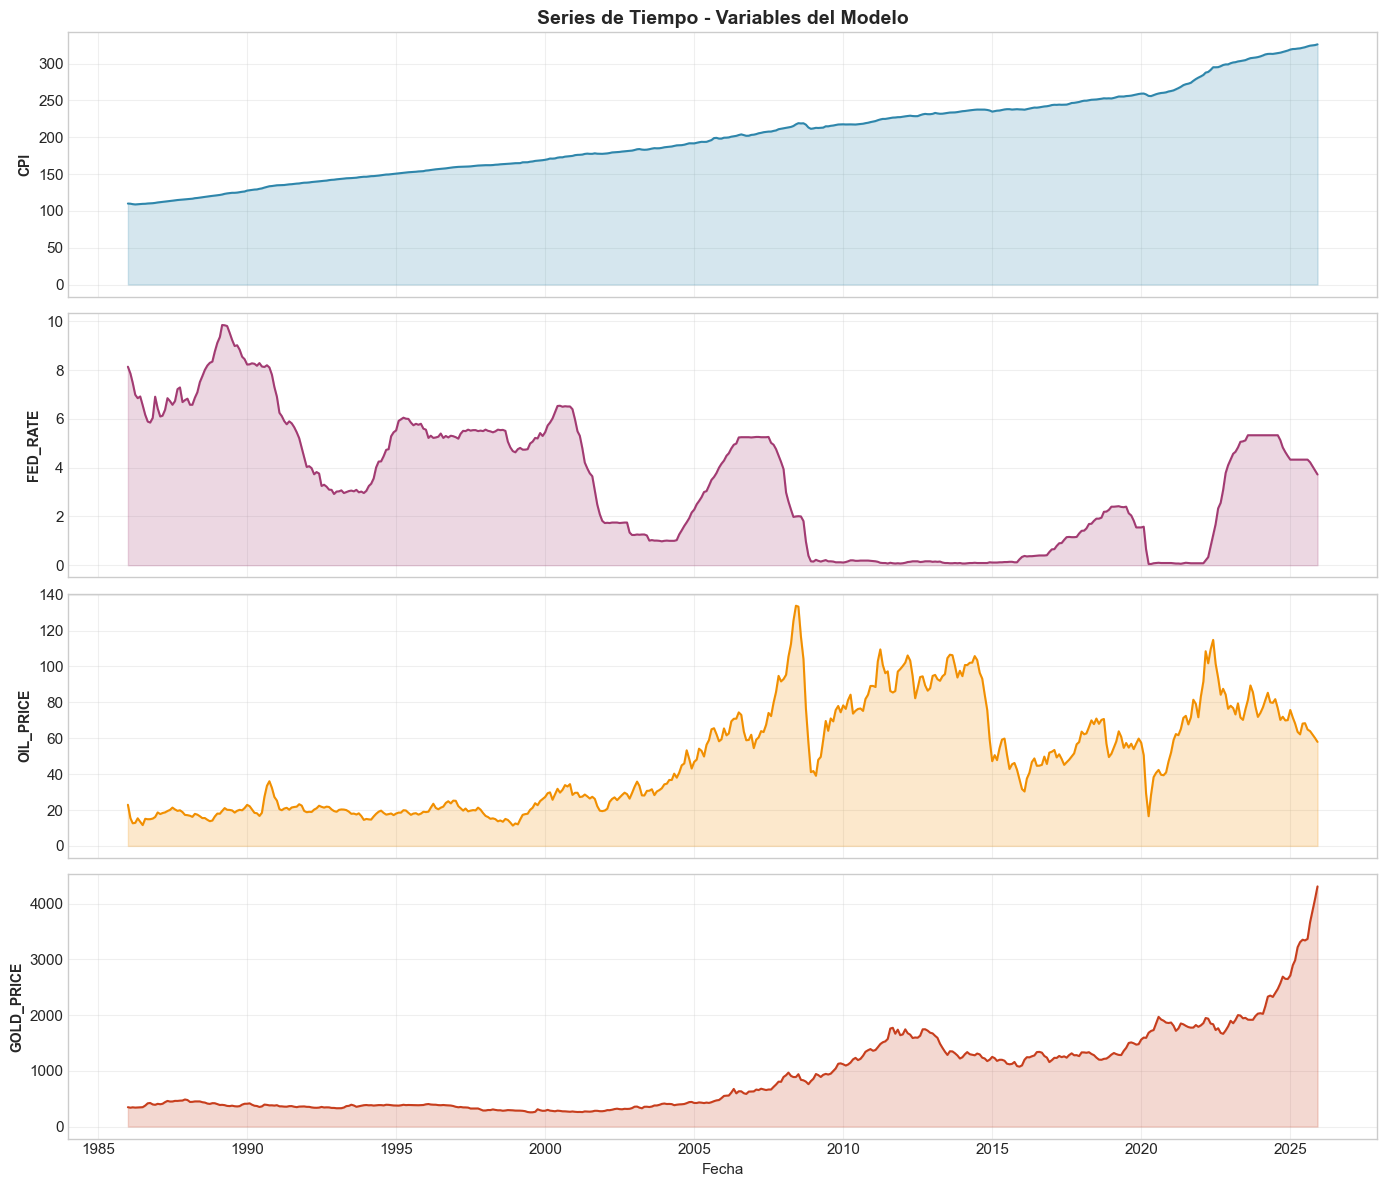

Guardado: eda_02_series_tiempo.png


In [14]:
# Series de tiempo
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

for ax, var, color in zip(axes, variables, colores):
    ax.plot(df['date'], df[var], color=color, linewidth=1.5)
    ax.set_ylabel(var.upper(), fontsize=10, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.fill_between(df['date'], df[var], alpha=0.2, color=color)

axes[0].set_title('Series de Tiempo - Variables del Modelo', fontsize=14, fontweight='bold')
axes[-1].set_xlabel('Fecha', fontsize=11)

plt.tight_layout()
plt.savefig('figures/eda_02_series_tiempo.png', dpi=150, bbox_inches='tight')
plt.show()
print("Guardado: eda_02_series_tiempo.png")

## 5. Correlaciones

In [15]:
# Matriz de correlación
corr_matrix = df[variables].corr()

print("MATRIZ DE CORRELACIÓN")
print("=" * 60)
print(corr_matrix.round(3))

MATRIZ DE CORRELACIÓN
              cpi  fed_rate  oil_price  gold_price
cpi         1.000    -0.568      0.738       0.889
fed_rate   -0.568     1.000     -0.563      -0.418
oil_price   0.738    -0.563      1.000       0.663
gold_price  0.889    -0.418      0.663       1.000


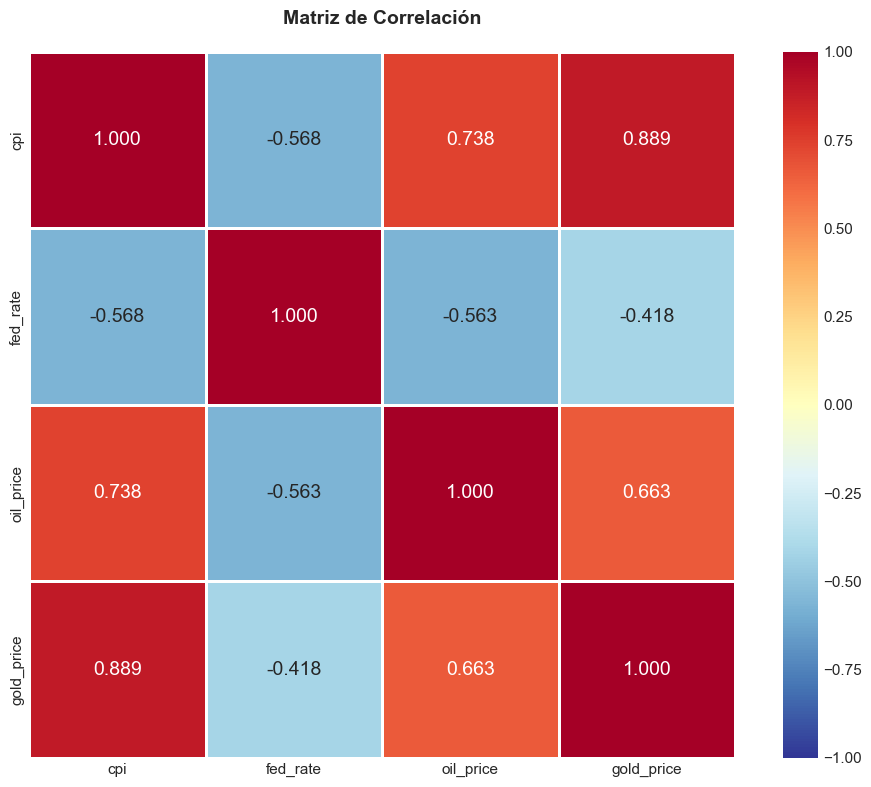

Guardado: eda_03_correlacion.png


In [16]:
# Heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='RdYlBu_r',
            center=0,
            square=True,
            linewidths=1,
            ax=ax,
            annot_kws={'size': 14},
            vmin=-1, vmax=1)

ax.set_title('Matriz de Correlación', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('figures/eda_03_correlacion.png', dpi=150, bbox_inches='tight')
plt.show()
print("Guardado: eda_03_correlacion.png")

## 6. Relación con CPI (Target)

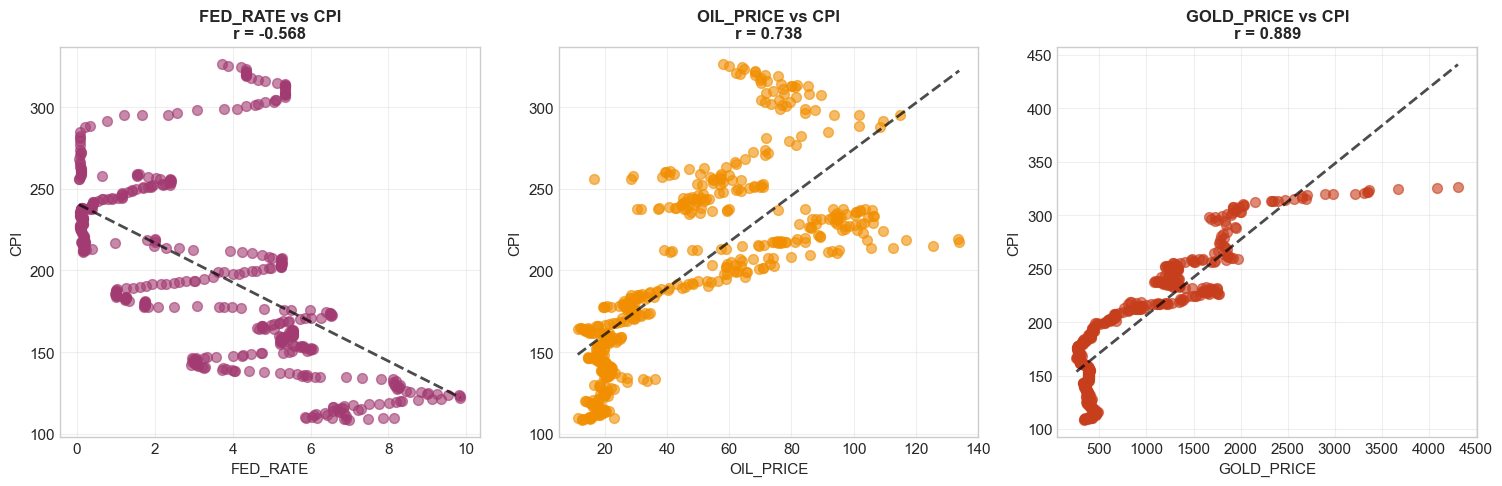

Guardado: eda_04_scatter_cpi.png


In [17]:
# Scatter plots vs CPI
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

predictores = ['fed_rate', 'oil_price', 'gold_price']
colores_pred = ['#A23B72', '#F18F01', '#C73E1D']

for ax, var, color in zip(axes, predictores, colores_pred):
    ax.scatter(df[var], df['cpi'], alpha=0.6, c=color, s=50)
    ax.set_xlabel(var.upper(), fontsize=11)
    ax.set_ylabel('CPI', fontsize=11)
    
    # Línea de tendencia
    z = np.polyfit(df[var], df['cpi'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[var].min(), df[var].max(), 100)
    ax.plot(x_line, p(x_line), 'k--', linewidth=2, alpha=0.7)
    
    # Correlación
    corr = df['cpi'].corr(df[var])
    ax.set_title(f'{var.upper()} vs CPI\nr = {corr:.3f}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/eda_04_scatter_cpi.png', dpi=150, bbox_inches='tight')
plt.show()
print("Guardado: eda_04_scatter_cpi.png")

## 7. Detección de Outliers

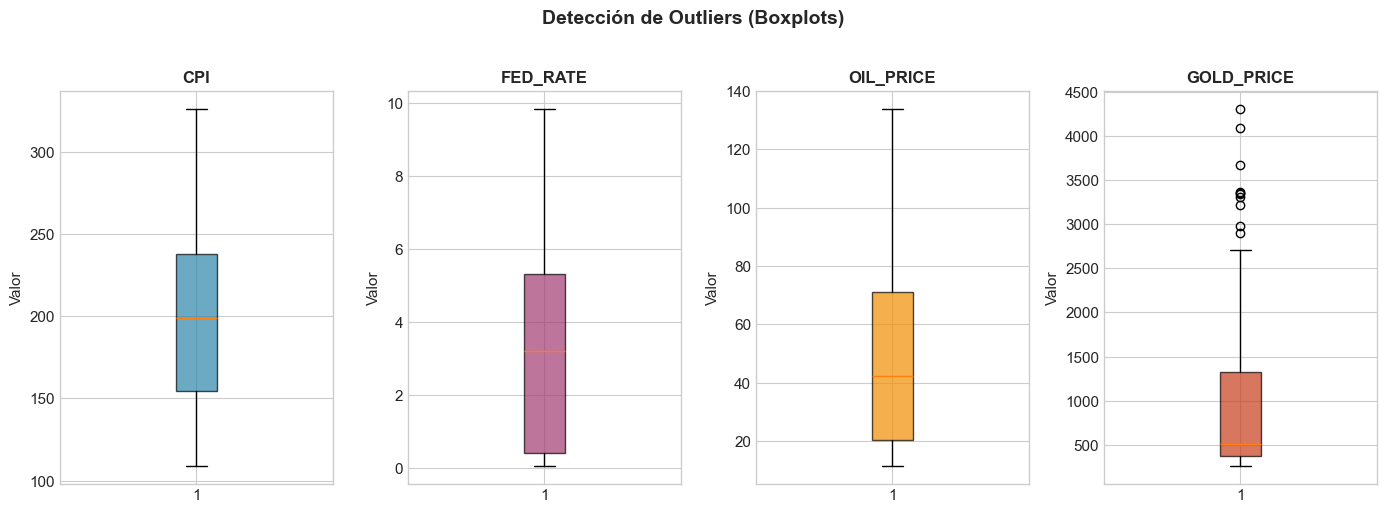

Guardado: eda_05_outliers.png


In [18]:
# Boxplots
fig, axes = plt.subplots(1, 4, figsize=(14, 5))

for ax, var, color in zip(axes, variables, colores):
    bp = ax.boxplot(df[var], patch_artist=True)
    bp['boxes'][0].set_facecolor(color)
    bp['boxes'][0].set_alpha(0.7)
    ax.set_title(var.upper(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor')

plt.suptitle('Detección de Outliers (Boxplots)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('figures/eda_05_outliers.png', dpi=150, bbox_inches='tight')
plt.show()
print("Guardado: eda_05_outliers.png")

In [19]:
# Cuantificar outliers con IQR
print("DETECCIÓN DE OUTLIERS (método IQR)")
print("=" * 60)

for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[var] < lower) | (df[var] > upper)]
    
    print(f"\n{var.upper()}")
    print(f"  Rango normal: [{lower:.2f}, {upper:.2f}]")
    print(f"  Outliers: {len(outliers)} ({100*len(outliers)/len(df):.1f}%)")

DETECCIÓN DE OUTLIERS (método IQR)

CPI
  Rango normal: [28.92, 363.27]
  Outliers: 0 (0.0%)

FED_RATE
  Rango normal: [-6.99, 12.72]
  Outliers: 0 (0.0%)

OIL_PRICE
  Rango normal: [-56.29, 147.71]
  Outliers: 0 (0.0%)

GOLD_PRICE
  Rango normal: [-1070.88, 2763.54]
  Outliers: 10 (2.1%)


## 8. Análisis de Inflación

In [20]:
# Calcular tasas de inflación
df['cpi_pct_mom'] = df['cpi'].pct_change() * 100  # Month over month
df['cpi_pct_yoy'] = df['cpi'].pct_change(12) * 100  # Year over year

print("ESTADÍSTICAS DE INFLACIÓN")
print("=" * 60)
print(f"\nInflación MoM:")
print(f"  Media: {df['cpi_pct_mom'].mean():.2f}%")
print(f"  Máxima: {df['cpi_pct_mom'].max():.2f}%")
print(f"  Mínima: {df['cpi_pct_mom'].min():.2f}%")

print(f"\nInflación YoY:")
print(f"  Media: {df['cpi_pct_yoy'].mean():.2f}%")
print(f"  Máxima: {df['cpi_pct_yoy'].max():.2f}%")
print(f"  Mínima: {df['cpi_pct_yoy'].min():.2f}%")

ESTADÍSTICAS DE INFLACIÓN

Inflación MoM:
  Media: 0.23%
  Máxima: 1.38%
  Mínima: -1.77%

Inflación YoY:
  Media: 2.81%
  Máxima: 8.98%
  Mínima: -1.96%


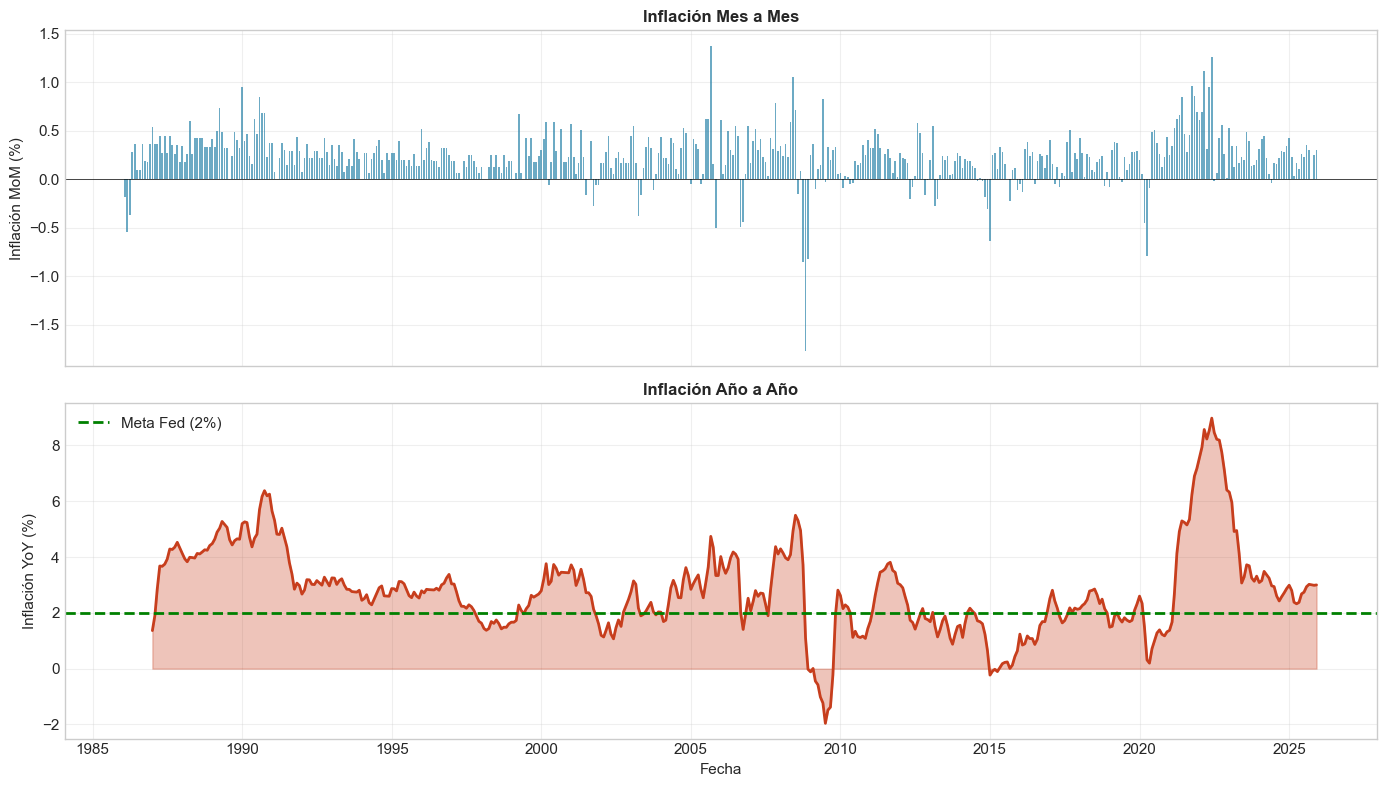

Guardado: eda_06_inflacion.png


In [21]:
# Gráfico de inflación
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Inflación mes a mes
axes[0].bar(df['date'], df['cpi_pct_mom'], color='#2E86AB', alpha=0.7, width=20)
axes[0].axhline(0, color='black', linewidth=0.5)
axes[0].set_ylabel('Inflación MoM (%)')
axes[0].set_title('Inflación Mes a Mes', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Inflación año a año
axes[1].plot(df['date'], df['cpi_pct_yoy'], color='#C73E1D', linewidth=2)
axes[1].fill_between(df['date'], df['cpi_pct_yoy'], alpha=0.3, color='#C73E1D')
axes[1].axhline(2, color='green', linewidth=2, linestyle='--', label='Meta Fed (2%)')
axes[1].set_ylabel('Inflación YoY (%)')
axes[1].set_xlabel('Fecha')
axes[1].set_title('Inflación Año a Año', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/eda_06_inflacion.png', dpi=150, bbox_inches='tight')
plt.show()
print("Guardado: eda_06_inflacion.png")

## 9. Pairplot Completo

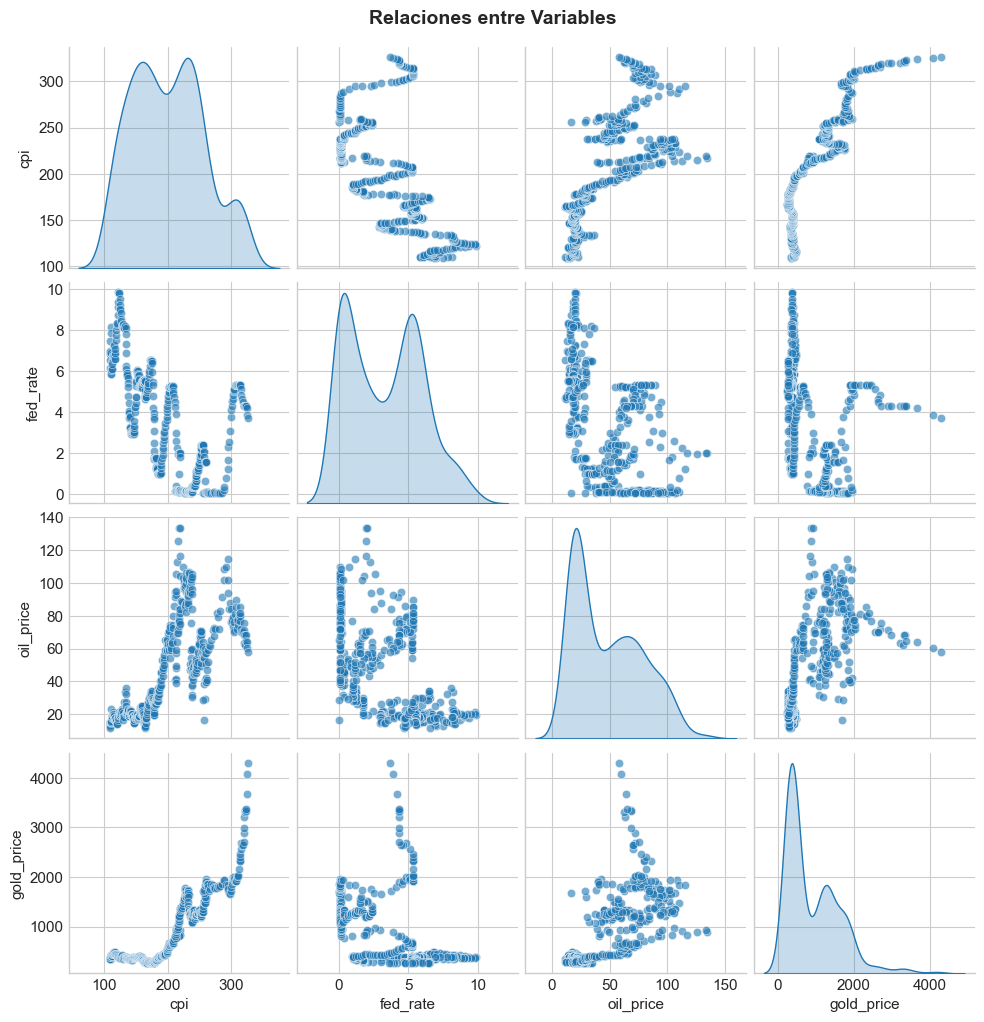

Guardado: eda_07_pairplot.png


In [22]:
# Pairplot
g = sns.pairplot(df[variables], diag_kind='kde', plot_kws={'alpha': 0.6})
g.fig.suptitle('Relaciones entre Variables', y=1.02, fontsize=14, fontweight='bold')

plt.savefig('figures/eda_07_pairplot.png', dpi=150, bbox_inches='tight')
plt.show()
print("Guardado: eda_07_pairplot.png")

## 10. Resumen de Hallazgos

In [23]:
print("="*60)
print("RESUMEN DE HALLAZGOS DEL EDA")
print("="*60)

print("\n1. CORRELACIONES CON CPI:")
for var in predictores:
    corr = df['cpi'].corr(df[var])
    fuerza = "fuerte" if abs(corr) > 0.7 else "moderada" if abs(corr) > 0.4 else "débil"
    direccion = "positiva" if corr > 0 else "negativa"
    print(f"   {var}: {corr:.3f} ({fuerza}, {direccion})")

print("\n2. DISTRIBUCIONES:")
for var in variables:
    skew = df[var].skew()
    tipo = "simétrica" if abs(skew) < 0.5 else "sesgada a la derecha" if skew > 0 else "sesgada a la izquierda"
    print(f"   {var}: {tipo} (skew={skew:.2f})")

print("\n3. OUTLIERS:")
for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[var] < Q1 - 1.5*IQR) | (df[var] > Q3 + 1.5*IQR)]
    print(f"   {var}: {len(outliers)} outliers ({100*len(outliers)/len(df):.1f}%)")

print("\n4. PERÍODO DE ANÁLISIS:")
print(f"   {df['date'].min().strftime('%Y-%m')} a {df['date'].max().strftime('%Y-%m')}")
print(f"   {len(df)} observaciones mensuales")

RESUMEN DE HALLAZGOS DEL EDA

1. CORRELACIONES CON CPI:
   fed_rate: -0.568 (moderada, negativa)
   oil_price: 0.738 (fuerte, positiva)
   gold_price: 0.889 (fuerte, positiva)

2. DISTRIBUCIONES:
   cpi: simétrica (skew=0.31)
   fed_rate: simétrica (skew=0.28)
   oil_price: sesgada a la derecha (skew=0.58)
   gold_price: sesgada a la derecha (skew=1.38)

3. OUTLIERS:
   cpi: 0 outliers (0.0%)
   fed_rate: 0 outliers (0.0%)
   oil_price: 0 outliers (0.0%)
   gold_price: 10 outliers (2.1%)

4. PERÍODO DE ANÁLISIS:
   1986-01 a 2025-12
   479 observaciones mensuales


## Próximos Pasos

1. **Feature Engineering:** Crear lags, promedios móviles, variaciones
2. **Modelado:** Entrenar modelos de predicción
3. **Evaluación:** Walk-forward validation